In [261]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import scipy.stats as sps

# Задача №1
## Условие:
Сгенерируйте выборку $X_1, ..., X_N$ из равномерного рас\-пределения
на отрезке $[0, \theta]$ для $N = 10^4.$ Для всех $n\leq N$
посчитайте оценки па\-раметра $\theta$ из теоретической задачи:
$2\overline{X},$ $\overline{X} + X_{(n)}/2,$ $(n + 1)X_{(1)},$
$X_{(1)} + X_{(n)},$ $\frac{n+1}{n}X_{(n)}.$ Постройте на одном
графике разными цветами для всех оценок функции модуля раз\-ности
оценки и истинного значения $\theta$ в зависимости от $n.$ Если
некоторые оценки (при фиксированном значении $n$) сильно отличаются
от истинного значения параметра $\theta,$ то исключите их и
постройте еще один график со всеми кривыми (для измененно\-го
значения $\theta$). Для избавления от больших значений разности в
начале ограничьте масштаб графика. Для наглядности точки можно
соединить линиями. Какая оценка получилась лучше (в смысле
упомянутого модуля разности при $n = N$)? Проведите эксперимент для
разных значений $\theta$ (количество графиков равно количеству
значе\-ний $\theta$).

In [262]:
def conduct_experiment_1(N, theta, ylim=None, inds=[0, 1, 2, 3, 4]):
    # Получаем выборку из нашего распределения
    X = scipy.stats.uniform(0, theta).rvs(N)
    
    # Вычисляем различные оценки (в том же порядке, что и в условии)
    estimations = [
        2 * np.cumsum(X) / np.arange(1, N + 1),
        np.cumsum(X) / np.arange(1, N + 1) + np.maximum.accumulate(X) / 2,
        np.arange(2, N + 2) * np.minimum.accumulate(X),
        np.minimum.accumulate(X) + np.maximum.accumulate(X),
        np.arange(2, N + 2) / np.arange(1, N + 1) * np.maximum.accumulate(X)
    ]
    
    # Запишем эти оценки чтобы отобразить на графике
    labels = [
        '$2\\overline{X}$',
        '$\\overline{X} + \\frac{X_{(n)}}{2}$',
        '$(n + 1)X_{(1)}$',
        '$X_{(1)} + X_{(n)}$',
        '$\\frac{n + 1}{n} X_{(n)}$'
    ]
    
    plt.figure(figsize=(14, 6))
    plt.title('Модуль отклонения оценки от истинного параметра', fontsize=16)

    x_grid = np.arange(1, N + 1)
    for ind in inds:
        estimation = estimations[ind]
        label = labels[ind]
        # отобразим модуль разности данной оценки и истинного значения параметра
        plt.plot(x_grid, np.abs(estimation - theta), label=label)

    plt.ylim(ylim)
    plt.legend(fontsize=18)
    plt.xlabel('$N$', fontsize=18)
    plt.show()

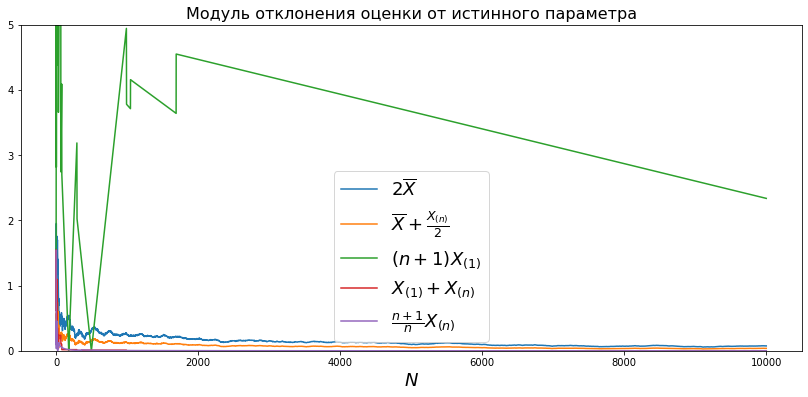

In [263]:
conduct_experiment_1(10000, 5, (0, 5))

### Вывод:
Оценка $(n + 1)X_{(1)}$ плохо приближает истинное значение параметра. Попробуем ее исключить.

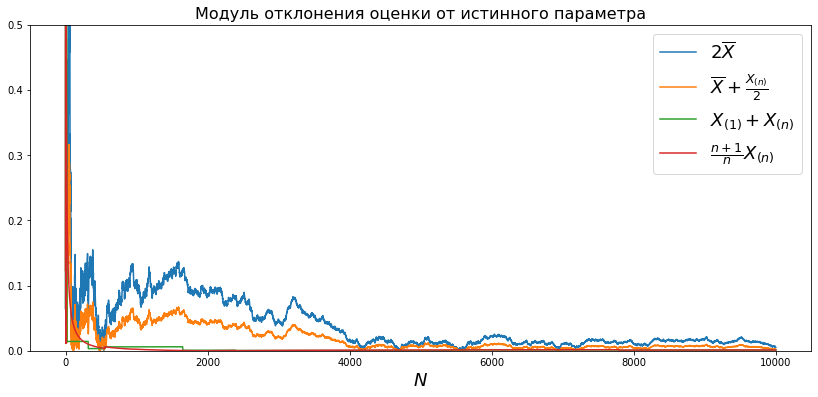

In [264]:
conduct_experiment_1(10000, 5, (0, 0.5), [0,1,3,4])

### Вывод:
Стало лучше, теперь еще попробуем последовательно исключить из рассмотрения оценки $2\overline{X}$ и $\overline{X} + \frac{X_{(n)}}{2}$

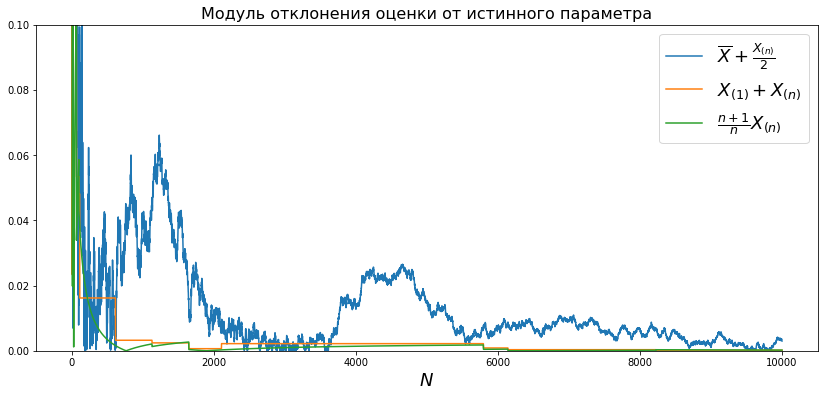

In [265]:
conduct_experiment_1(10000, 5, (0, 0.1), [1,3,4])

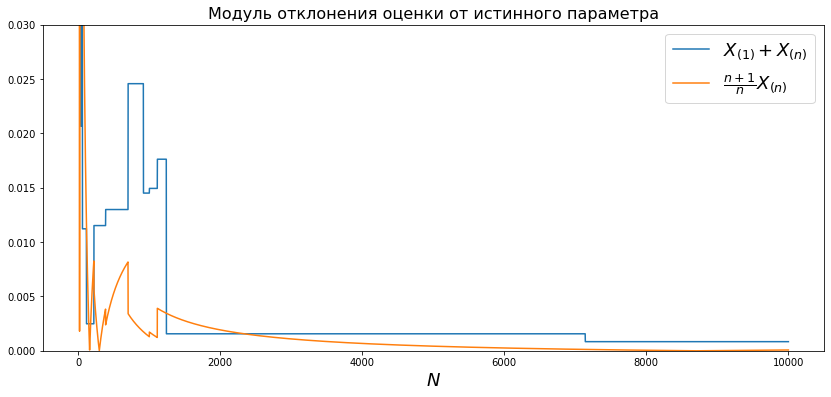

In [295]:
conduct_experiment_1(10000, 5, (0, 0.03), [3,4])

### Вывод
Для данного $\theta=5$ лучше всего приближает истинное значение параметра оценки $\frac{n + 1}{n} X_{(n)}$ и $X_{(1)}+X_{(n)}$

#### Еще раз посмотрим на все оценки при таком параметре, но при большем приближении

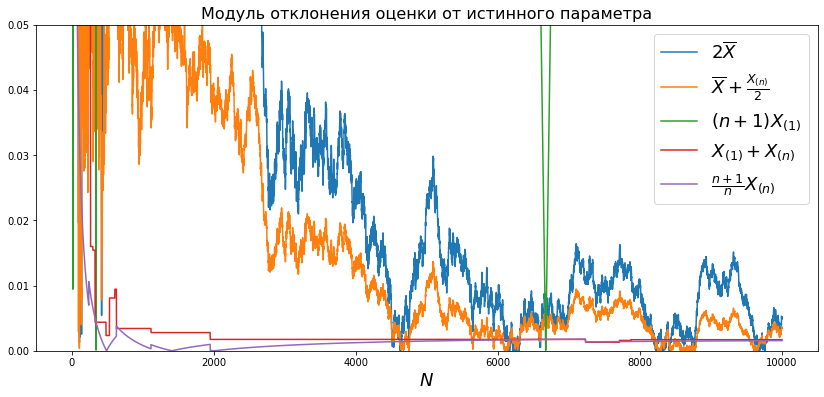

In [267]:
conduct_experiment_1(10000, 5, (0, 0.05))

Немного увеличим истинное значение параметра

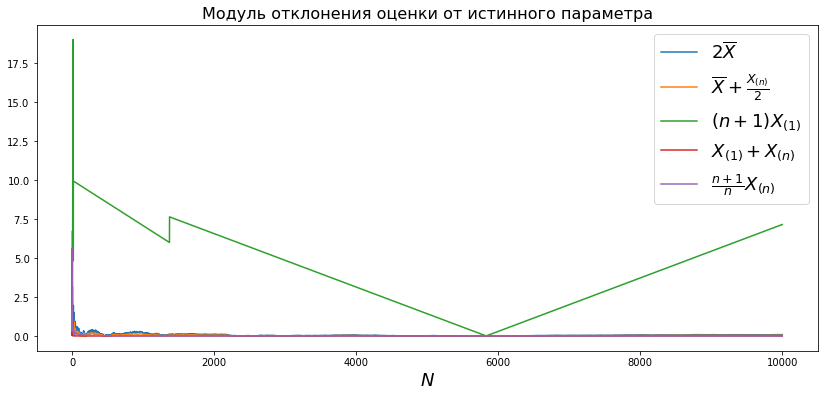

In [268]:
conduct_experiment_1(10000, 10)

### Вывод
При $\theta=10$ оценка $(n + 1)X_{(1)}$ тоже плохо приближает истинное значение параметра.

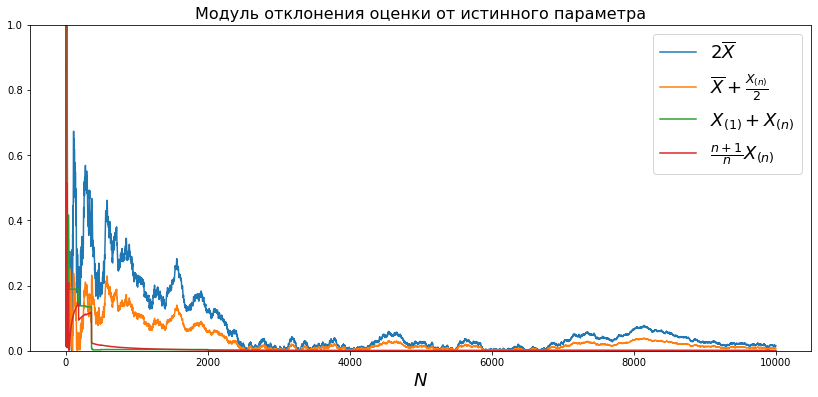

In [269]:
conduct_experiment_1(10000, 10, inds=[0,1,3,4], ylim=(0, 1))

Кажется, что при большем значении истинного параметра, оценки  $2\overline{X}$ и $\overline{X} + \frac{X_{(n)}}{2}$ приближают его хуже. Попробуем еще увеличить значение параметра

$\theta:=50$

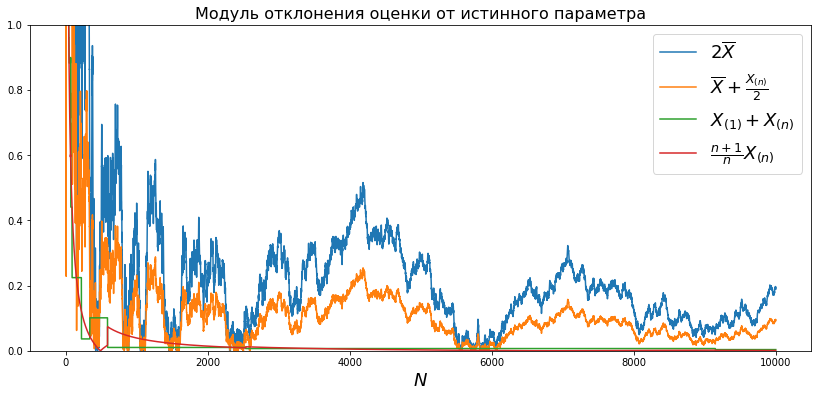

In [305]:
conduct_experiment_1(10000, theta=50, ylim=(0,1), inds=[0,1,3,4])

$\theta:=150$

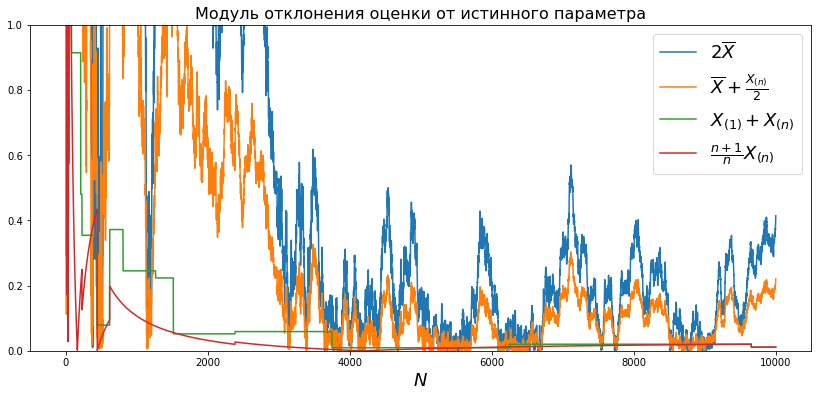

In [304]:
conduct_experiment_1(10000, theta=150, ylim=(0,1), inds=[0,1,3,4])

###  Вывод:
Да, действительно при увеличении истинного значения параметра, оценки  $2\overline{X}$ и $\overline{X} + \frac{X_{(n)}}{2}$ становятся с каждым разом все хуже.

Но попробуем увеличить размер выборки

$N=150'000$

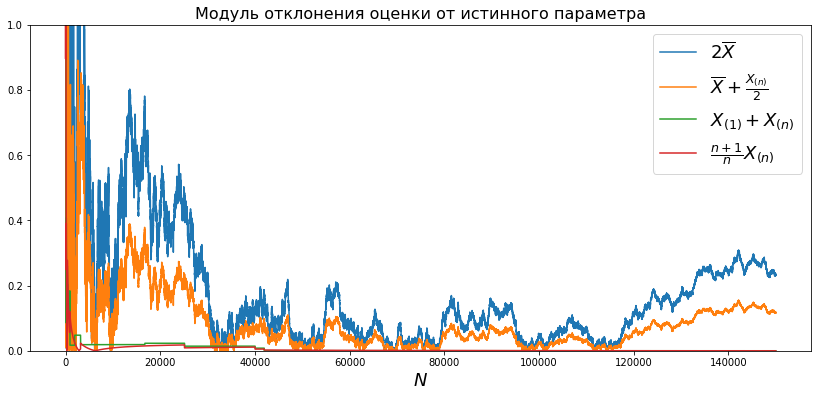

In [291]:
conduct_experiment_1(150000, 150, inds=[0,1,3,4], ylim=(0, 1))

Как видно, с увеличением размера выборки, даже при большом значении истинного параметра, точность всех оценок возрасла

Посмотрим еще раз вблизи на оценки, которые вели себя лучше остальных, но теперь при $\theta=150$, $N=10^4$

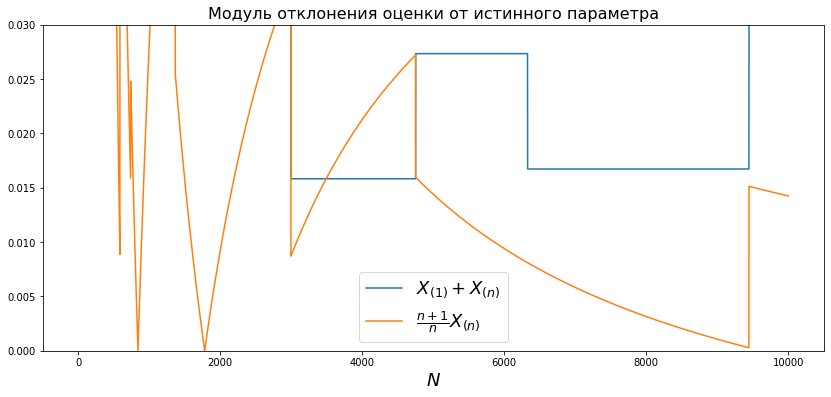

In [300]:
conduct_experiment_1(10000, 150, inds=[3,4], ylim=(0, 0.03))

### Вывод
Оценки $\frac{n + 1}{n} X_{(n)}$ и $X_{(1)} + X_{(n)}$, которые при $\theta=5$ очень хорошо приближали истинное значение параметра, при $\theta=150$ и таком же размере выборки приближают параметр намного хуже.

Попробуем теперь снова увеличить размер выборки, оставив прежнее значение параметра $\theta = 150$

$N:=150'000$

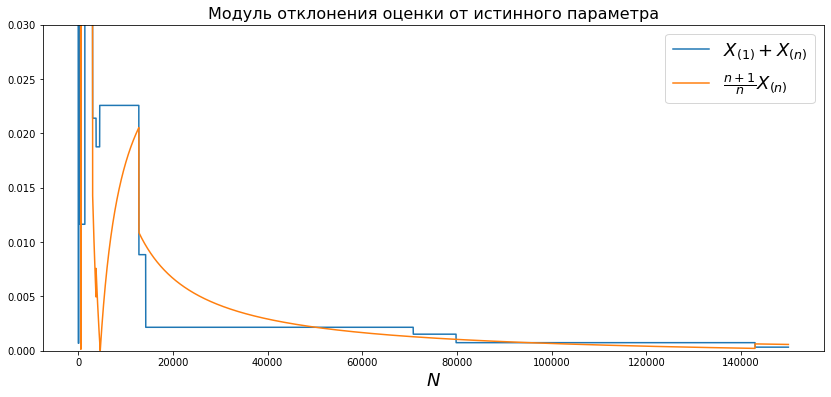

In [303]:
conduct_experiment_1(150000, 150, inds=[3,4], ylim=(0, 0.03))

Теперь снова эти оценки достаточно хорошо приближают параметр. Как и было раньше, для данного $\theta=150$ лучше всего приближает истинное значение параметра оценки $\frac{n + 1}{n} X_{(n)}$ и $X_{(1)}+X_{(n)}$

Теперь вспомним про нашу "плохую" оценку $(n + 1)X_{(1)}$

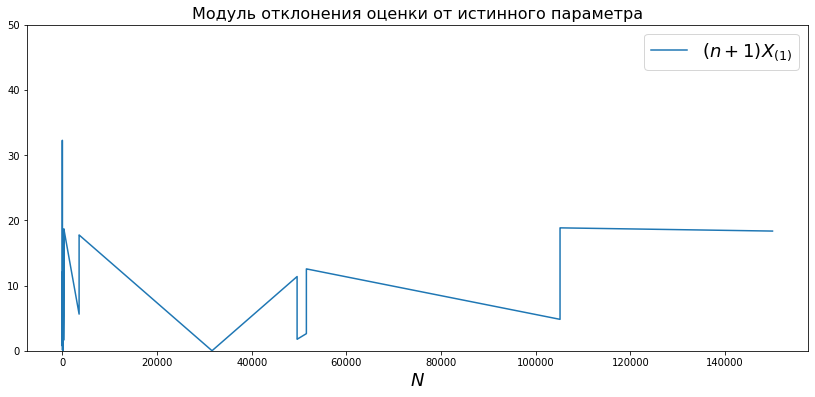

In [275]:
conduct_experiment_1(150000, 20, inds=[2], ylim=(0, 50))

Видим, чтооценка $(n + 1)X_{(1)}$ даже при больших размерах выборки и относительно небольшом значении параметра плохо приближает истинное значение параметра

## Вывод
Чем больше параметр, тем хуже приближают его оценки при фиксированном размере выборки. Чем больше размер выборки, тем лучше приближают большинство оценок параметр (при фиксированном значении параметра). Лушими оценками оказались оценки $\frac{n + 1}{n} X_{(n)}$ и $X_{(1)}+X_{(n)}$

# Задача №2
## Условие:
Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального
распределения с параметром $\theta = 1$ для $N = 10^4.$ Для всех
$n\leq N$ посчитайте оценку $(k!/\overline{X^k})^{1/k}$ параметра
$\theta.$ Проведите исследование, аналогичное предыдущей задаче, и
выясните, при каком $k$ оценка ведет себя лучше (рассмотрите не
менее 10 различных значений $k$).

In [329]:
from math import factorial

# по выборке Х и числу k возвращает оценку из условия
def estimate_exponential_distribution(X, k):
    N = X.shape[0]
    # cсчитаем нашу оценку из условия задачи
    estimations = (factorial(k) / (np.cumsum(X ** k) \
                                   / np.arange(1, N + 1))) ** (1 / k)
    return estimations

In [277]:
def conduct_experiment_2(N, theta, ylim=None):
    X = scipy.stats.expon(scale=1. / theta).rvs(N)
    
    # для k = 1..10 считаем оценку из условия
    estimations = [estimate_exponential_distribution(X, k) for k in range(1, 11)]
    # Далее просто наносим на график значения оценки для каждого k
    labels = ['$k={}$'.format(k) for k in range(1, len(estimations)+1)]
    
    plt.figure(figsize=(14, 6))
    plt.title('Модуль отклонения оценки от истинного параметра', fontsize=16)

    x_grid = np.arange(1, N + 1)
    for estimation, label in zip(estimations, labels):
        plt.plot(x_grid, np.abs(estimation - theta), label=label)

    plt.ylim(ylim)
    plt.legend(fontsize=18)
    plt.xlabel('$N$', fontsize=18)
    plt.show()

### Решение
Запустим несколько раз для разных размеров выборки нашу функцию и увидим, какая из оценок лучше.

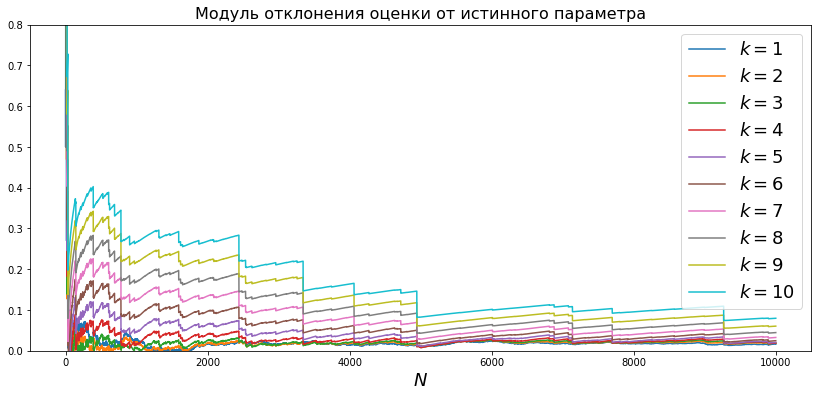

In [278]:
conduct_experiment_2(10000, 1, (0, 0.8))

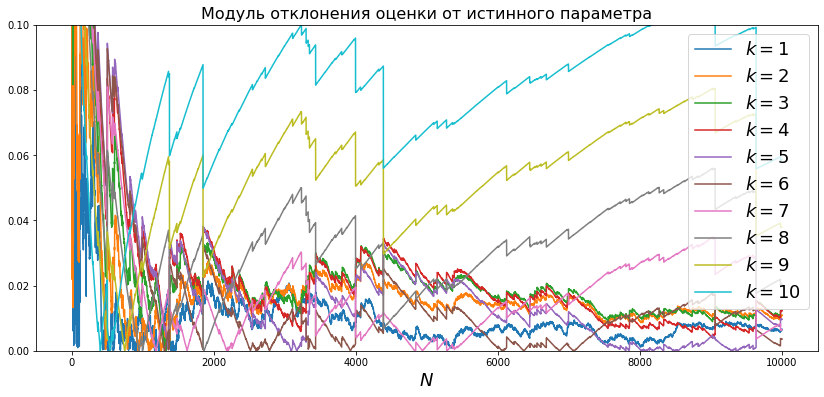

In [306]:
conduct_experiment_2(10000, 1, (0, 0.1))

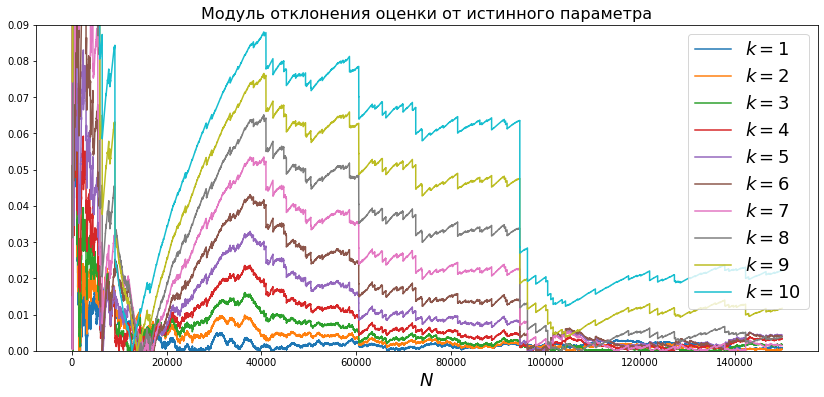

In [308]:
conduct_experiment_2(150000, 1, (0, 0.09))

### Вывод:
Легко заметить, что чем бОльше $k$, тем хуже ведет себя соответствующая оценка. То есть, как правило, при $k=1$ оценка наилучшая

# Задача №3
## Условие:
 Придумайте распределение, у которого конечны первые
четыре момента, а пятый -- нет. Сгенерируйте выборку $X_1, ..., X_N$
из этого распре\-деления для $N = 10^4.$ Постройте график плотности,
а также нанесите точки выборки на график (с нулевой
$y$-координатой). Для всех $n\leq N$ посчитайте оценку $s^2 =
s^2(X_1, ..., X_N)$ для дисперсии. Постройте график зависимости
модуля разности оценки дисперсии и ее истинного значения от $n.$
Проведите аналогичное исследование для выборки из распределения
Коши, где вместо графика модуля разности оценки дисперсии и ее
истинного значения (которого не существует) постройте график оценки
дисперсии.

## Решение:
Рассмотрим распределение Парето с такой плотностью:
$$f_{X}(x)=\left\{\begin{array}{ll}{\frac{\alpha x_{\mathrm{m}}^{\alpha}}{x^{\alpha+1}}} & {x \geq x_{\mathrm{m}}} \\ {0} & {x<x_{\mathrm{m}}}\end{array}\right.$$

Возьмем $x_m=1$, $\alpha=5$. Тогда первые 4 момента существую, а пятый - нет.

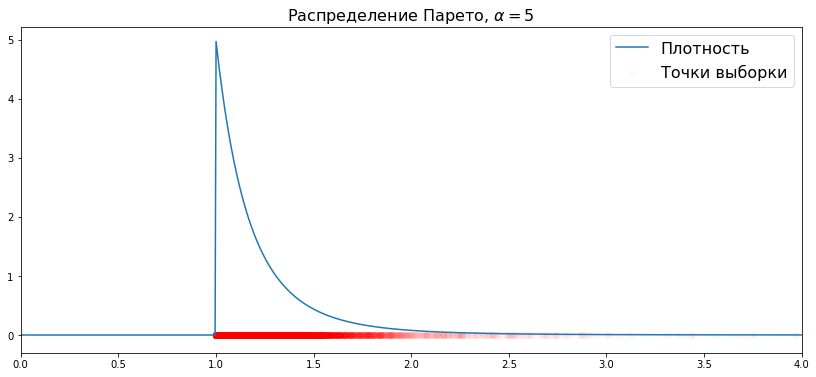

In [281]:
# задаем максимальный размер выборки
N = 10**4
# Задаем параметр распределения
b = 5

# получаем выборку из нашего распределения (Парето с параметром 5)
distr = sps.pareto(b=b)
X = distr.rvs(N)

# Далее просто отображаем на графике плотность распределения и точки выборки
grid = np.linspace(0, 5, 1000)
plt.figure(figsize=(14, 6))
# отображаем плотность
plt.plot(grid, distr.pdf(grid), label='Плотность')
# отображаем точки выборки
plt.scatter(X, np.zeros_like(X), alpha=0.02, c='red', label='Точки выборки')
# Пишем заголовок
plt.title('Распределение Парето, $\\alpha=5$', fontsize=16)
plt.xlim((0, 4))
plt.legend(fontsize=16)
plt.show()

### Замечание: 
Можно наблюдать, что там, где плотность распределения больше, туда попадает больше точек в выборке (красный цвет более насыщенный)

Рассмотрим такую статистику:
$$S^{2}=\frac{1}{n} \sum_{i=1}^{n}\left(X_{i}-\overline{X}\right)^{2} = \overline{X^{2}}-\overline{X}^{2}$$

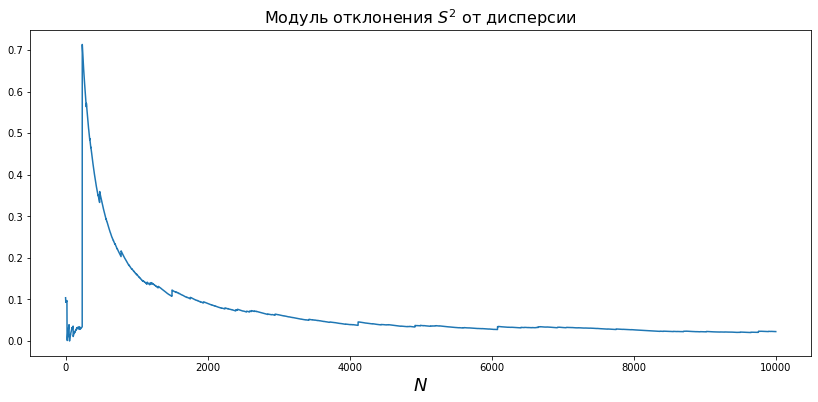

In [282]:
# Считаем S^2
S2 = np.cumsum(X ** 2) / np.arange(1, N + 1) - \
    (np.cumsum(X) / np.arange(1, N + 1)) ** 2

# Задаем размер графика
plt.figure(figsize=(14, 6))
plt.title('Модуль отклонения $S^2$ от дисперсии', fontsize=16)
plt.xlabel('$N$', fontsize=18)

# Рисуем зависимость модуля разности дисперсии и S^2 от n
plt.plot(np.abs(S2 - distr.var()))

plt.show()

### Вывод:
Оценка $S^2$ хорошо приближает дисперсию

Теперь рассмотрим распределение Коши с такой плотностью:
$$f(x)=\frac{1}{\pi\left(1+x^{2}\right)}$$

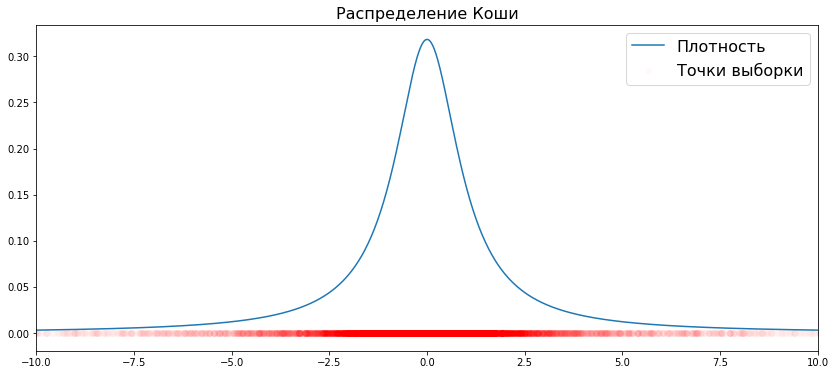

In [324]:
# Задаем максимальный размер выборки
N = 10**4

# Получаем наше распределение и выборку из него
distr = sps.cauchy()
X = distr.rvs(N)

# Аналогично отображаем на графике плотность и точки выборки
grid = np.linspace(-10, 10, 1000)
plt.figure(figsize=(14, 6))
plt.plot(grid, distr.pdf(grid), label='Плотность')
plt.scatter(X, np.zeros_like(X), alpha=0.02, c='red', label='Точки выборки')
plt.title('Распределение Коши', fontsize=16)
plt.xlim((-10, 10))
plt.legend(fontsize=16)
plt.show()

Аналогично посчитаем $S^2$ для Распределения Коши

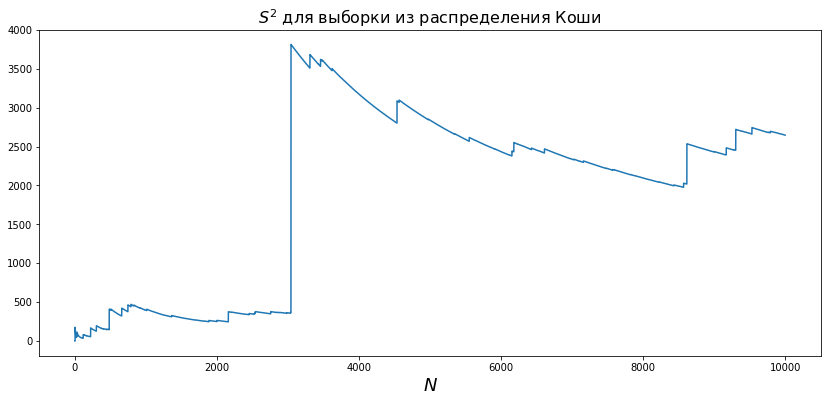

In [325]:
# Считаем S^2
S2 = np.cumsum(X ** 2) / np.arange(1, N + 1) - \
    (np.cumsum(X) / np.arange(1, N + 1)) ** 2

# Задаем размер графика
plt.figure(figsize=(14, 6))
plt.title('$S^2$ для выборки из распределения Коши', fontsize=16)
plt.xlabel('$N$', fontsize=18)

# Рисуем зависимость модуля разности дисперсии и S^2 от n
plt.plot(S2)

plt.show()

### Вывод:
Для данного распределения статистика $S^2$ никуда не сходится, что ожидаемо, так как у распределения Коши нет дисперсии.

# Задача №4
## Условие:
Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпирической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). Для всех $n \leq N$
посчитайте точное значение $D_n = \sup_{x\in\mathbb{R}}
|\hat{F}_n(x) - F(x)|$ и постройте график зависимости статистик
$D_n$ и $\sqrt{n}D_n$ от $n.$

In [285]:
# !pip3.7 install statsmodels --user
from statsmodels.distributions.empirical_distribution import ECDF

In [286]:
# Возвращает D_n, X - выборка, true_distribution - истинное распределение с
# функцией распределения F(x)
def get_D_n(X, true_distribution):

    # Получаем истинную функцию распределения F(x)
    true_cdf = true_distribution.cdf
    # Считаем эмпирическую функцию распределения
    emperical_cdf = ECDF(X)
    
    # Вычисляем D_n (по формуле из условия)
    D_n = np.amax(np.abs(true_cdf(X) - emperical_cdf(X)))
    return D_n

In [334]:
from math import ceil

# первая часть - графики эмпирической функции распределения
def conduct_experiment_4_part1(N):
    # получаем наше распределение
    X = scipy.stats.norm().rvs(N)
    
    n_list = [10, 25, 50, 100, 1000, N]
    # для некоторых "подвыборок" получаем эмпирическую функцию распределения
    ecdf_list = [ECDF(X[:n]) for n in n_list if n <= len(X)]

    plt.figure(figsize=(14, 12))
    
    grid = np.linspace(-5, 5, 1000)
    for i, (ecdf, n) in enumerate(zip(ecdf_list, n_list)):
        plt.subplot(ceil(len(ecdf_list) / 2), 2, i + 1)
        plt.title('$n = {}$'.format(n))
        # строим график эмпирической ф-ции распределения 
        plt.plot(grid, ecdf(grid))
        # отмечаем точки из выборки на этом графике 
        # (как раз в этих точка будут скачки ф-ции)
        plt.scatter(X[:n], np.zeros(n), c='green', alpha=0.2)
        
    plt.show()

In [332]:
# строим график зависимости статистик 𝐷𝑛 и √n𝐷𝑛 от 𝑛
def conduct_experiment_4_part2(N):
    X = scipy.stats.norm().rvs(N)
    
    # вычисляем D_n всех n <= N
    D_list = np.asarray([get_D_n(X[:n], scipy.stats.norm()) \
                         for n in range(1, N + 1)])

    plt.figure(figsize=(12, 8))
    
    #строим график статистики 𝐷𝑛
    plt.plot(np.arange(1, N + 1), D_list, label='$D_n$')
    # строим график статистики √n𝐷𝑛
    plt.plot(np.arange(1, N + 1), \
             np.sqrt(np.arange(1, N + 1)) * D_list, \
             label='$\\sqrt{n} D_n$')
    
    plt.legend(fontsize=18)
    plt.xlabel('$n$', fontsize=16)
    plt.show()

Для некоторых n построим графики эмпирической функции распределения

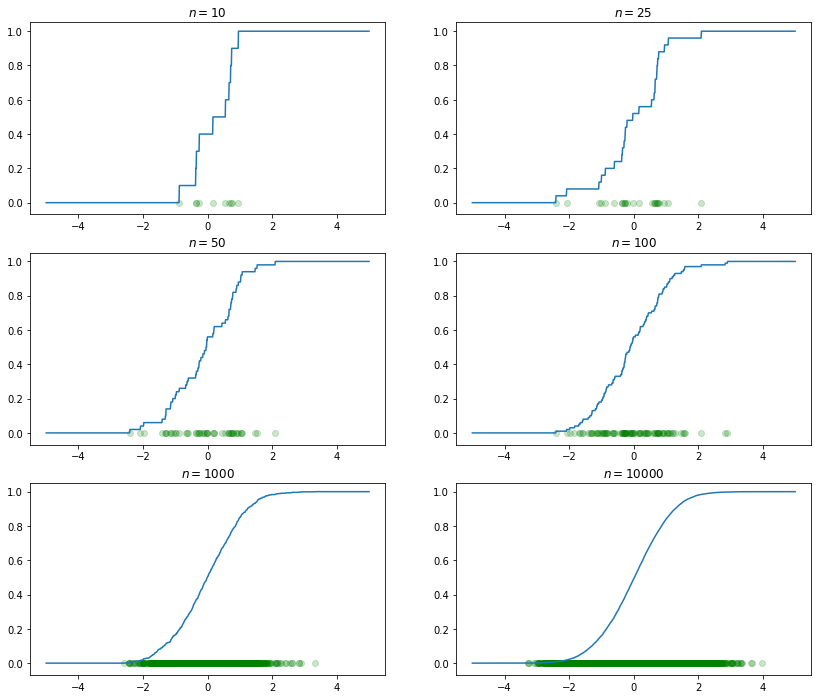

In [289]:
N = 10**4
conduct_experiment_4_part1(N)

### Вывод:
Видно, что чем больше размер выборки, тем более гладкой получается эмпирическая функция распределения и, соответственно, тем более похожей на настояющую функцию распределения

Теперь же посмотрим точнее, насколько эмпирическая функция распределения отличается от истинной функции распределения 

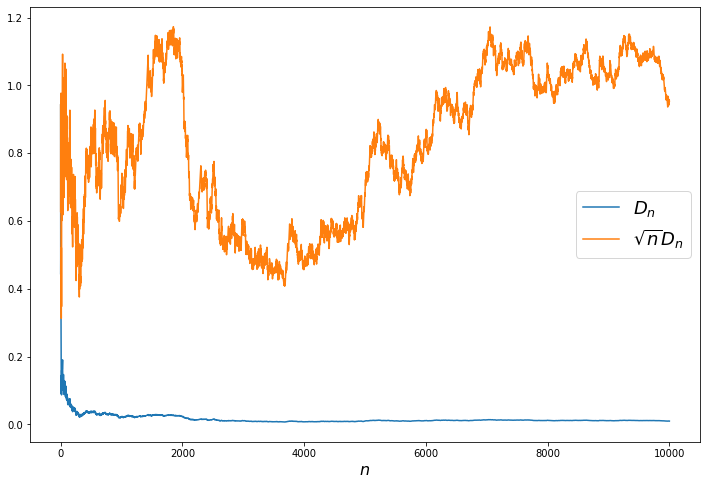

In [333]:
N = 10**4
conduct_experiment_4_part2(N)

### Вывод
Из графика видно, что $\lim _{n \rightarrow \infty} \sup _{x \in \mathbb{R}}|\hat{F}(x)-F(x)|=0$ (почти наверное)

Таким образом, мы экспериментально подтвердили теорему
Гливенко-Кантелли.